Exercise 2.2

In [138]:
import numpy as np

The exercise doesn't ask this, but I'll first run the simulation.

In [139]:
means_blue = np.random.multivariate_normal([1, 0], [[1, 0],[0,1]], size=10)
means_orange = np.random.multivariate_normal([0, 1], [[1, 0],[0,1]], size=10)

In [140]:
blues = np.empty((100,2))
for n in range(100):
    mean_index = np.random.choice(10)
    point = list(np.random.multivariate_normal(means_blue[mean_index], [[.2, 0],[0,.2]]))
    blues[n] = point
    
oranges = np.empty((100,2))
for n in range(100):
    mean_index = np.random.choice(10)
    point = list(np.random.multivariate_normal(means_orange[mean_index], [[.2, 0],[0,.2]]))
    oranges[n] = point

In [141]:
%matplotlib inline

import matplotlib.pyplot as plt

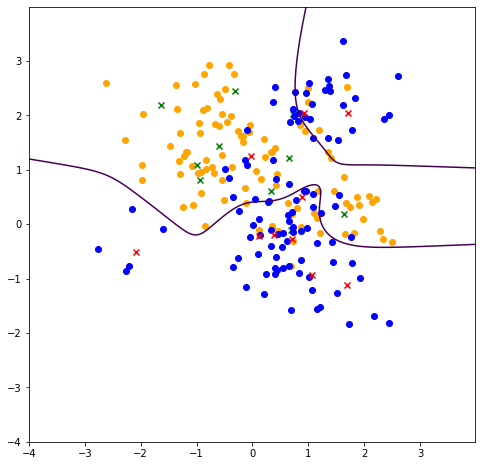

In [146]:
#Plots the generated point as orange/blue dots and means with x's:

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(oranges[:,0], oranges[:,1], c='orange', marker='o');
ax.scatter(means_orange[:,0], means_orange[:,1], c='green', marker='x');
ax.scatter(blues[:,0], blues[:,1], c='blue', marker='o');
ax.scatter(means_blue[:,0], means_blue[:,1], c='red', marker='x');

#Computes and plots the Bayes-optimal decision boundary:

from numpy import meshgrid
from scipy.stats import multivariate_normal

delta = 0.01
xrange = np.arange(-4, 4, delta)
yrange = np.arange(-4, 4, delta)
x, y = meshgrid(xrange,yrange)

points = np.dstack((x,y))

F = 0
G = 0
for k in range(10):
    F += multivariate_normal(means_blue[k], [[.2, 0], [0, .2]]).pdf(points)
    G += multivariate_normal(means_orange[k], [[.2, 0], [0, .2]]).pdf(points)

ax.contour(x, y, (F - G), [0]);